<a href="https://colab.research.google.com/github/Devansh1004/Credit-Card-Fraud-Detection/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub
dhanushnarayananr_credit_card_fraud_path = kagglehub.dataset_download('dhanushnarayananr/credit-card-fraud')

print('Data source import complete.')

100%|██████████| 28.9M/28.9M [00:00<00:00, 43.6MB/s]

Extracting files...


Data source import complete.


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [11]:
os.listdir(dhanushnarayananr_credit_card_fraud_path)

['card_transdata.csv']

In [13]:
df = pd.read_csv(dhanushnarayananr_credit_card_fraud_path+"/card_transdata.csv")

In [14]:
df

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0


In [15]:
df.isnull().sum()

,0
distance_from_home,0
distance_from_last_transaction,0
ratio_to_median_purchase_price,0
repeat_retailer,0
used_chip,0
used_pin_number,0
online_order,0
fraud,0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [17]:
df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
df['fraud'].value_counts()

,count
fraud,
0.0,912597
1.0,87403


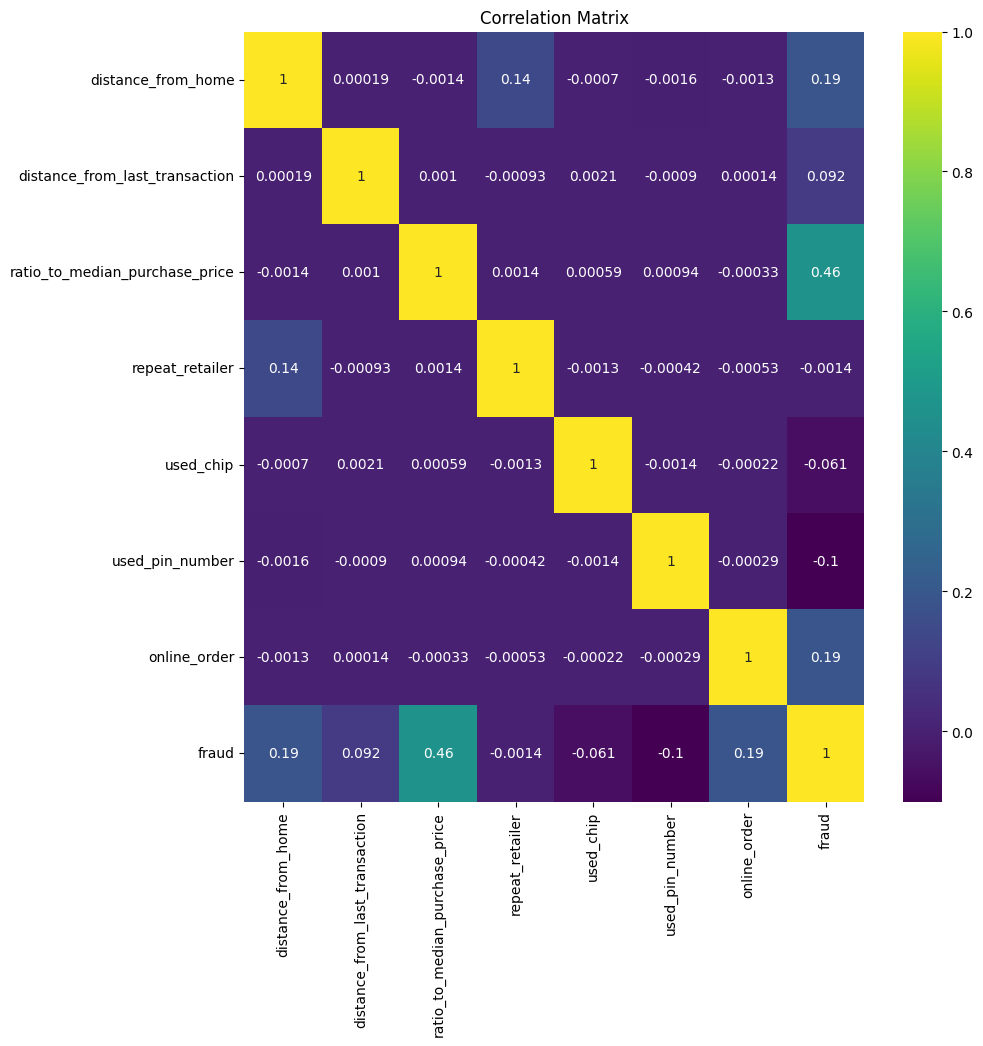

In [19]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap='viridis')
plt.title('Correlation Matrix')
plt.show()

In [38]:
categ_cols = ['repeat_retailer', 'used_chip', 'used_pin_number', 'online_order']
num_cols = ['distance_from_home', 'distance_from_last_transaction',	'ratio_to_median_purchase_price']

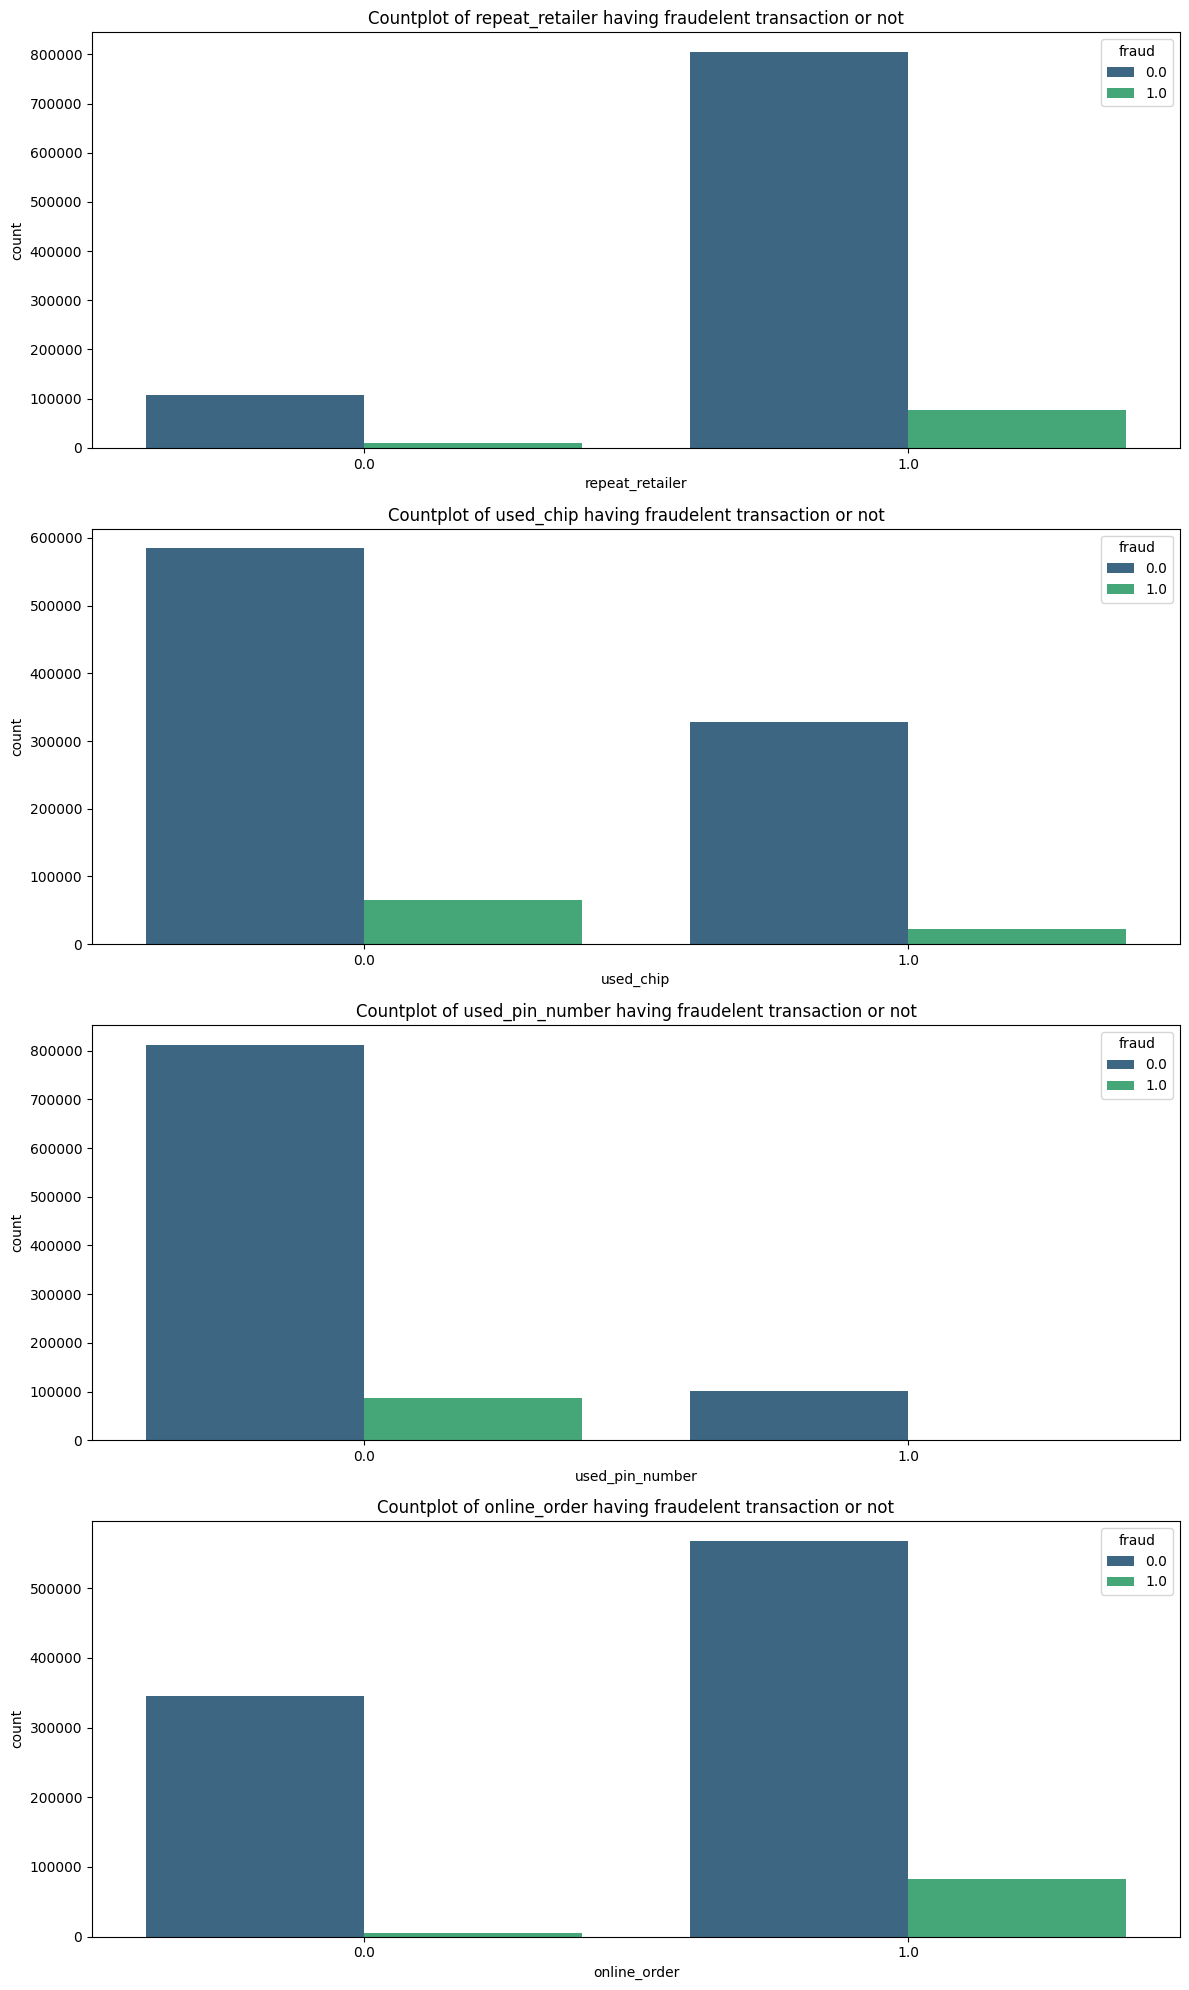

In [45]:
fig, axes = plt.subplots(nrows=len(categ_cols), ncols=1, figsize=(12,16))

for i in range(len(categ_cols)):
    sns.countplot(x=categ_cols[i], data=df, hue='fraud', palette='viridis', ax=axes[i])
    axes[i].set_title(f'Countplot of {categ_cols[i]} having fraudelent transaction or not')

    # for p in axes[0,0].patches:
    #     axes[0,0].annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
    #                 ha='center', va='baseline', fontsize=9, color='black', xytext=(0, 3),
    #                 textcoords='offset points')

plt.tight_layout()
plt.show()

In [21]:
# df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [ ]:
# import warnings
# warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")

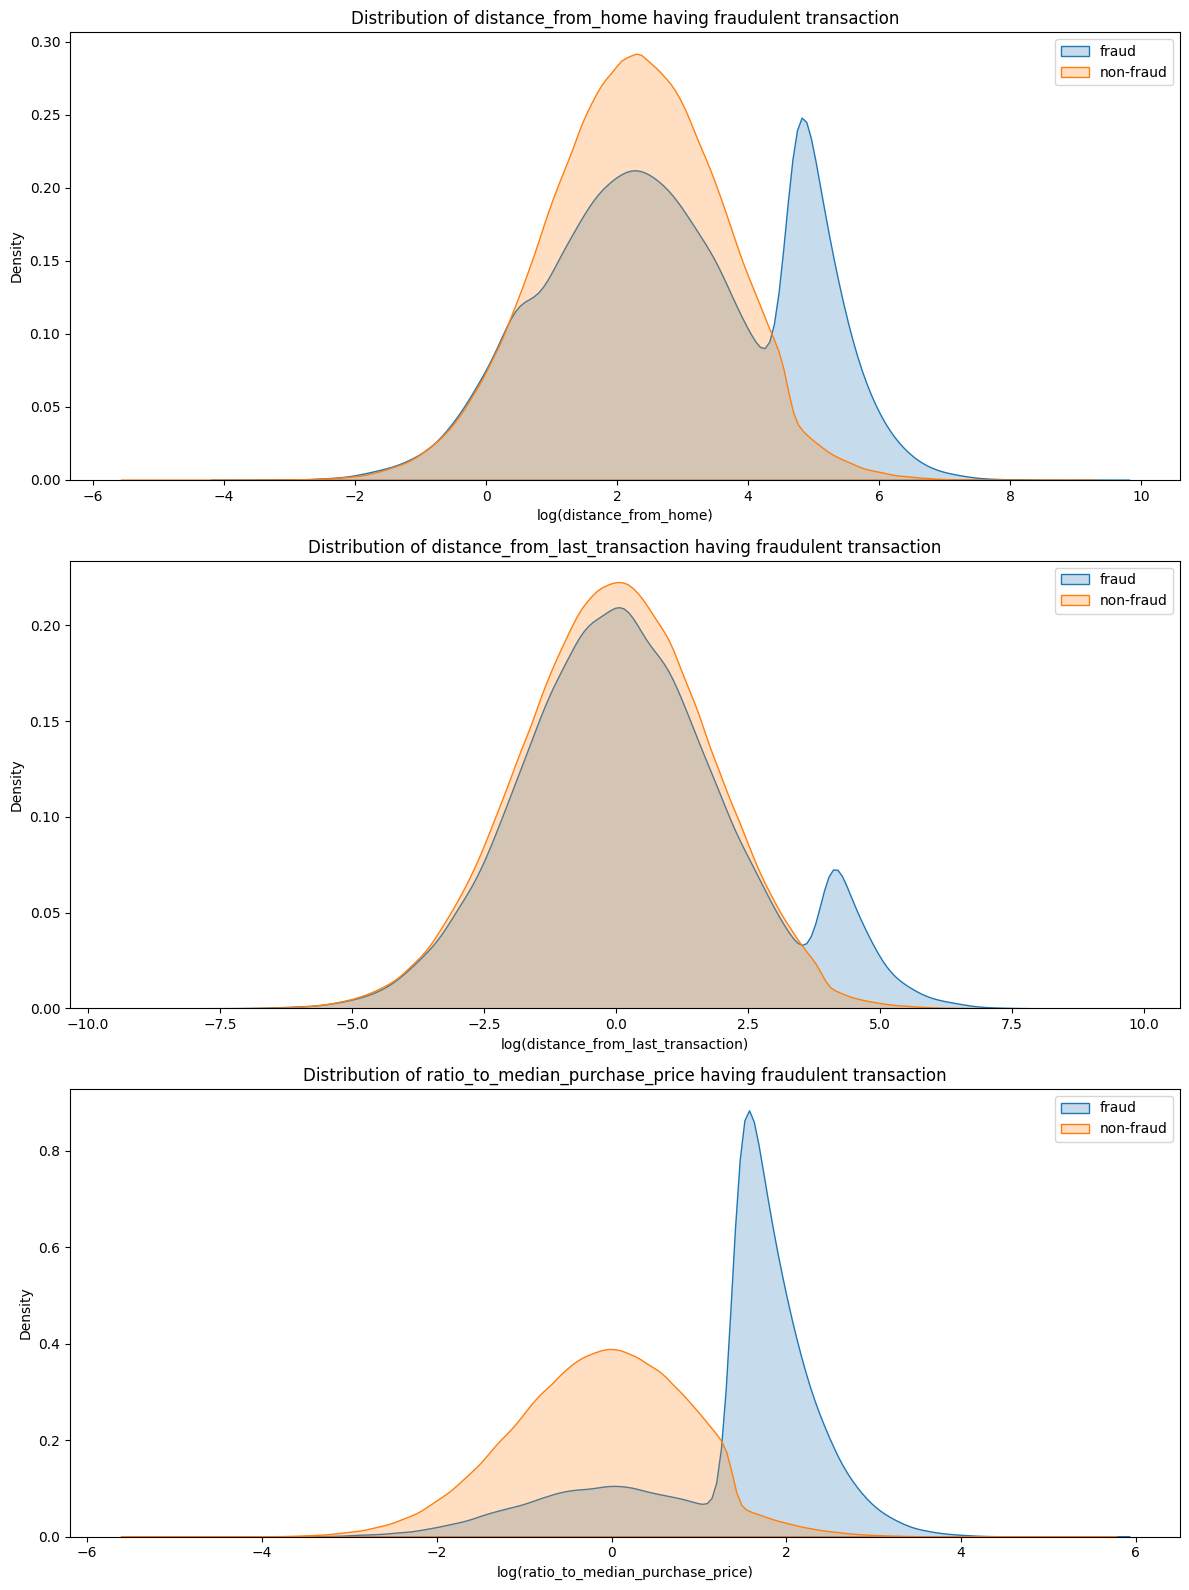

In [51]:
fig, axes = plt.subplots(nrows=len(num_cols), ncols=1, figsize=(12,16))

for i in range(len(num_cols)):
    sns.kdeplot(np.log(df[df['fraud'] == 1][num_cols[i]]), ax=axes[i], label='fraud', fill=True)
    sns.kdeplot(np.log(df[df['fraud'] == 0][num_cols[i]]), ax=axes[i], label='non-fraud', fill=True)
    axes[i].set_title(f'Distribution of {num_cols[i]} having fraudulent transaction')
    axes[i].set_xlabel(f'log({num_cols[i]})')
    axes[i].legend()

plt.tight_layout()
plt.show()

In [54]:
quantiles = np.arange(0.99, 1, 0.001)

for i in num_cols:
    print(f'{i}:')
    for j in quantiles:
        print(df[i].quantile(j), end=", ")
    print()

distance_from_home:
259.9438981402364, 273.94101343879777, 291.495417524483, 313.09475954306293, 337.7426171925923, 371.89462396001886, 412.2725965383674, 468.51435531417906, 564.4283019103865, 757.8827453846902, 10632.723672241103, 
distance_from_last_transaction:
65.7256059845316, 70.56510061174873, 76.09898263083134, 83.30993892824651, 92.27588876726163, 103.25969675709847, 118.78365508660016, 139.98728017850905, 177.4185497483742, 260.89896264151037, 11851.10456494614, 
ratio_to_median_purchase_price:
12.794085597651492, 13.361246171601428, 14.024094516815884, 14.77684597382084, 15.704400429426787, 16.825160767302282, 18.299391941788958, 20.350850999845086, 23.57383799939754, 29.422767087451447, 267.8029421832708, 


In [55]:
df

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0


In [56]:
X = df.drop('fraud', axis=1)
y = df['fraud']

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [81]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [83]:
X_train

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
566853,0.147170,-0.181191,-0.588185,1.0,1.0,0.0,1.0
382311,-0.091174,-0.168859,-0.415653,1.0,1.0,0.0,1.0
241519,-0.334813,-0.100009,0.612860,1.0,1.0,0.0,1.0
719220,-0.317543,-0.143624,-0.551591,1.0,0.0,0.0,1.0
905718,0.077164,-0.126583,-0.590736,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
259178,-0.399916,-0.058666,-0.606761,0.0,0.0,0.0,0.0
365838,1.336886,-0.184330,-0.107909,1.0,0.0,0.0,0.0
131932,-0.094246,-0.190421,-0.325631,1.0,0.0,0.0,0.0
671155,-0.255480,-0.184217,-0.232974,1.0,0.0,0.0,1.0


In [86]:
target_names = ['Not Fraud', 'Fraud']

In [93]:
rfc = RandomForestClassifier(n_estimators=25, random_state=42, verbose=1, n_jobs=-1)
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   26.5s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  25 out of  25 | elapsed:    0.2s finished


Text(50.722222222222214, 0.5, 'True Label')

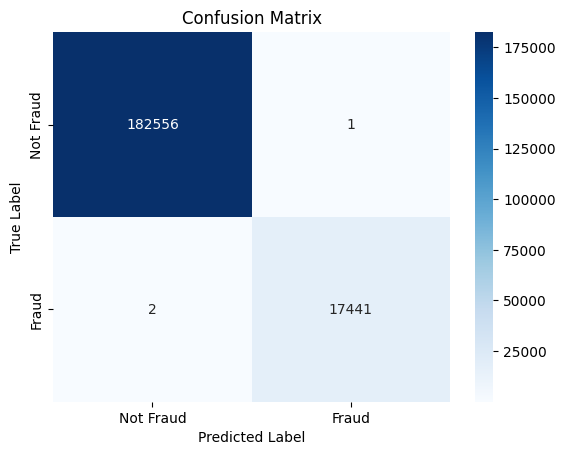

In [94]:
sns.heatmap(confusion_matrix(y_test, y_pred_rfc), annot=True, cmap="Blues", fmt="d", xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

Text(0, 0.5, 'Feature')

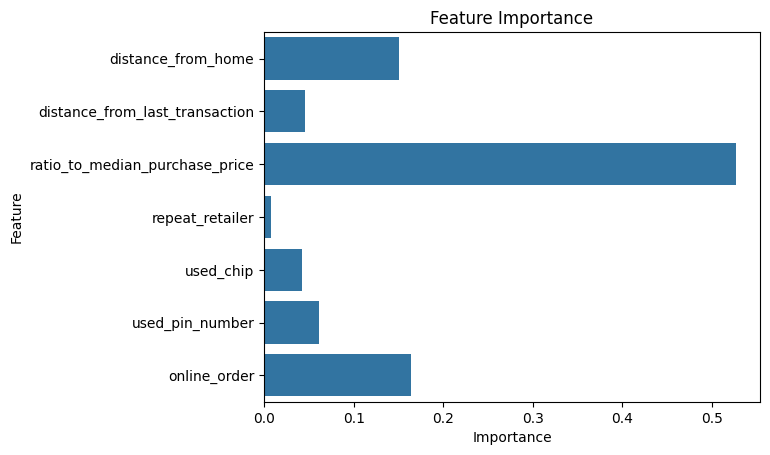

In [95]:
sns.barplot(x=rfc.feature_importances_, y=X_train.columns)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')

In [ ]:
from sklearn.svm import SVC

svc = SVC(verbose=True, max_iter=10000, tol=0.5)
svc.fit(X_train, y_train)

y_pred_svc = svc.predict(X_test)
print(classification_report(y_test, y_pred_svc, digits=5))

[LibSVM]*......


In [96]:
lr = LogisticRegression(n_jobs=-1)
lr.fit(X_train, y_train)

LogisticRegression(n_jobs=-1)

Text(50.722222222222214, 0.5, 'True Label')

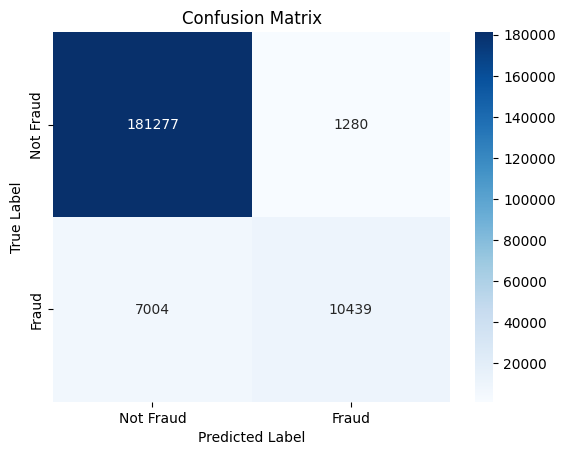

In [97]:
y_pred_lr = lr.predict(X_test)

target_names = ['Not Fraud', 'Fraud']
cm = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# print(classification_report(y_test, y_pred_lr, digits=5))

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_final, y_train)

print("Resampled dataset shape:", y_train_resampled.value_counts())

Resampled dataset shape: fraud

0.0    730040

1.0    730040

Name: count, dtype: int64


Random Forest Model

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   15.0s

[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  1.1min finished

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.

[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s

[Parallel(n_jobs=12)]: Done 150 out of 150 | elapsed:    0.2s finished


              precision    recall  f1-score   support



         0.0    0.99992   0.99743   0.99868    182557

         1.0    0.97380   0.99920   0.98633     17443



    accuracy                        0.99759    200000

   macro avg    0.98686   0.99831   0.99250    200000

weighted avg    0.99764   0.99759   0.99760    200000




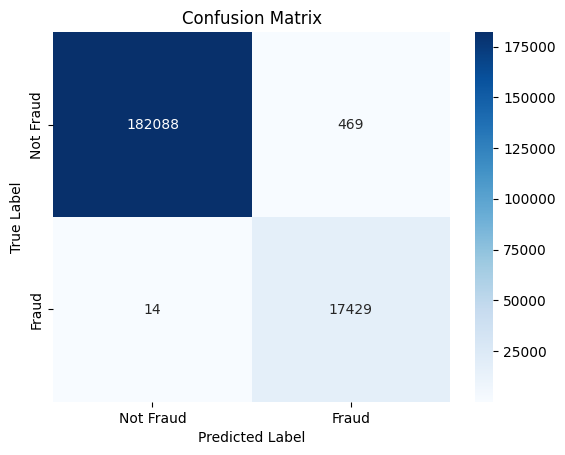

In [ ]:
model = RandomForestClassifier(n_estimators=150, random_state=42, n_jobs=-1, verbose=1)
model.fit(X_train_resampled, y_train_resampled)

y_pred_rf = model.predict(X_test_final)

cm = confusion_matrix(y_test, y_pred_rf)

target_names = ['Not Fraud', 'Fraud']

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

print(classification_report(y_test, y_pred_rf, digits=5))

XGBoost Classifier

c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:158: UserWarning: [12:05:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 

Parameters: { "use_label_encoder" } are not used.



  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score   support



         0.0    0.99952   0.99529   0.99740    182557

         1.0    0.95279   0.99501   0.97344     17443



    accuracy                        0.99526    200000

   macro avg    0.97616   0.99515   0.98542    200000

weighted avg    0.99545   0.99526   0.99531    200000




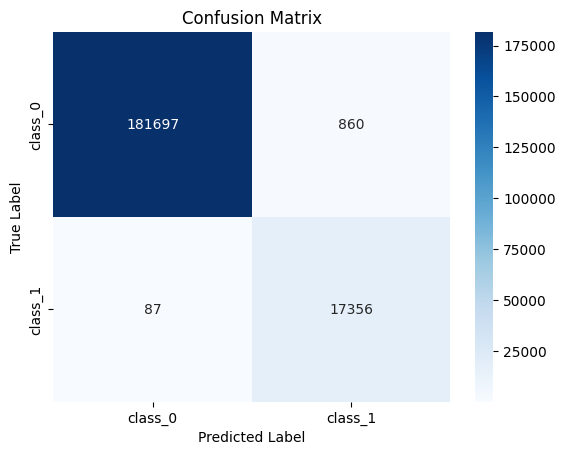

In [ ]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(
    objective='binary:logitraw',
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42,
	max_depth = 5
)
xgb_model.fit(X_train_resampled, y_train_resampled)

y_pred_xgb = xgb_model.predict(X_test_final)

cm = confusion_matrix(y_test, y_pred_xgb)

target_names = ['class_0', 'class_1']

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

print(classification_report(y_test, y_pred_xgb, digits=5))

Stacked Model (Random Forest + XGBoost + SVC)

In [ ]:
from sklearn.ensemble import StackingClassifier

rf_model = RandomForestClassifier(n_estimators=150, random_state=42, n_jobs=-1, verbose=1)

xgb_model = XGBClassifier(
    objective='binary:logitraw',
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42,
	max_depth = 5,
	verbose = 1
)

svc_model = SVC(verbose=True, max_iter=20000)

base_learners = [
    ('RandomForest', model),
    ('xgb', xgb_model),
	('svc', svc_model)
]

meta_classifier = LogisticRegression(verbose=1)

stacking_clf = StackingClassifier(estimators=base_learners, final_estimator=meta_classifier, verbose = 2)
stacking_clf.fit(X_train_resampled, y_train_resampled)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   13.5s

[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  1.0min finished

c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:158: UserWarning: [12:11:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 

Parameters: { "use_label_encoder", "verbose" } are not used.



  warnings.warn(smsg, UserWarning)


[LibSVM]

c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=20000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

  warnings.warn(

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   10.7s

[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   49.3s finished

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.

[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s

[Parallel(n_jobs=12)]: Done 150 out of 150 | elapsed:    0.3s finished

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   10.4s

[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   47.9s finished

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.

[Parallel(n_

[LibSVM]

c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=20000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

  warnings.warn(


[LibSVM]

c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=20000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

  warnings.warn(


[LibSVM]

In [ ]:
y_pred_stacked = stacking_clf.predict(X_test_final)

cm = confusion_matrix(y_test, y_pred_xgb)

target_names = ['class_0', 'class_1']

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

print(classification_report(y_test, y_pred_xgb, digits=5))